# Crime Data

## Hierarchical

In [1]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
crime = pd.read_csv("crime_data.csv")

In [3]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
crime_data = crime.rename(columns={'Unnamed: 0':'Cities'}, inplace=False )

In [5]:
crime_data.head()

,Cities,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [7]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(crime_data.iloc[:,1:])
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


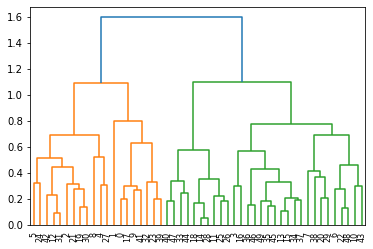

In [8]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [9]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

In [10]:
y_hc = hc.fit_predict(df_norm)
Clusters_data=pd.DataFrame(y_hc,columns=['Clusters'])

In [11]:
Clusters_data


,Clusters
0,0
1,0
2,3
3,1
4,3
5,3
6,1
7,1
8,3
9,0


In [12]:
Clusters_data['Clusters'].value_counts()

1    20
3    12
2    10
0     8
Name: Clusters, dtype: int64

### INFERENCE : 
#### We can conclude that cities in cluster 1 has high crime rates while cities in cluster 0 has low crime rates.

---------------------------------------------------------------------------------------------------------

## Kmeans

In [13]:
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
import numpy as np
from scipy.spatial.distance import cdist 

In [14]:
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [15]:
import warnings
warnings.filterwarnings("ignore")


In [16]:
wcss = []    # within column sum of squared

for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)

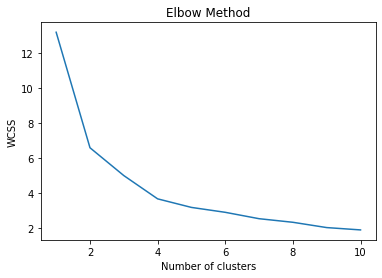

In [17]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
model = KMeans(n_clusters=4)
model.fit(df_norm)

model.labels_

array([3, 0, 0, 3, 0, 0, 1, 1, 0, 3, 1, 2, 0, 1, 2, 1, 2, 3, 2, 0, 1, 0,
       2, 3, 1, 2, 2, 0, 2, 1, 0, 0, 3, 2, 1, 1, 1, 1, 1, 3, 2, 3, 0, 1,
       2, 1, 1, 2, 2, 1])

In [19]:
md = pd.Series(model.labels_)
crime['clust'] = md



In [20]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,3


In [21]:
crime1 = crime.iloc[:,1:].groupby(crime.clust).mean()
crime1


,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,10.966667,264.000000,76.500000,33.608333,0
1,5.852941,141.176471,73.647059,19.335294,1
2,3.600000,78.538462,52.076923,12.176923,2
3,13.937500,243.625000,53.750000,21.412500,3


In [22]:
crime['clust'].value_counts()

1    17
2    13
0    12
3     8
Name: clust, dtype: int64

### INFERENCE : 
#### We can conclude that cities in cluster 0 has high crime rates while cities in cluster 2 has low crime rates.

---------------------------------------------------------------------------------------------------------------

## DB Scan

In [23]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [25]:
stscaler = StandardScaler().fit(df_norm)
x = stscaler.transform(df_norm)

In [26]:
dbscan = DBSCAN(eps=0.8, min_samples=4)
dbscan.fit(x)

DBSCAN(eps=0.8, min_samples=4)

In [27]:
dbscan.labels_


array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,  0,  0, -1,
       -1,  0, -1, -1, -1,  0, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1,  0,
        0,  0, -1,  0, -1, -1,  0, -1, -1, -1, -1,  0, -1, -1,  0,  0],
      dtype=int64)

In [28]:
dbscan_cluster = pd.DataFrame(dbscan.labels_,columns=['Clusters'])

In [29]:
dbscan_cluster

,Clusters
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


In [30]:
dbscan_cluster.value_counts()

Clusters
-1          33
 0          17
dtype: int64

### INFERENCE : 
#### We can conclude that cities in cluster -1 has approx. double crime rates compared to cities in cluster 0.